### Imports

In [1]:
import pickle as pkl 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist


### Data

In [3]:
with open('data/artist_features.pkl', 'rb') as f:
    artist_features = pkl.load(f)

In [3]:
# focus on rates for robustness against issues from song length
X = artist_features.drop(columns=['lines', 'words', 'syllables'])
X

,Lyrical/Misc,Bragging/Combative,Money/Party,Romance/Sex,words_per_line,unique_words,unique_word_rate,syllables_per_line,syllables_per_word
artist,,,,,,,,,
03 Greedo,0.012388,0.040464,0.021360,0.011842,35.125816,185.375000,0.070810,9.211347,0.261876
070 Shake,0.015179,0.001804,0.021861,0.036665,30.507007,137.470588,0.071274,8.091570,0.264949
2 Chainz,0.018329,0.023071,0.021967,0.006407,32.916186,194.111111,0.090778,8.641371,0.262462
2 Pistols,0.013755,0.030431,0.018532,0.021855,28.376804,178.272727,0.085574,7.243027,0.255224
21 Savage,0.007464,0.046448,0.046098,0.008801,33.424155,189.095238,0.070440,8.484020,0.253769
...,...,...,...,...,...,...,...,...,...
Zebra Katz,0.025077,0.012421,0.018921,0.016527,25.122420,132.944444,0.087163,6.521429,0.259716
Zelooperz,0.018682,0.037817,0.003213,0.006282,29.884914,151.060606,0.095839,7.746176,0.258715
Zion I,0.031290,0.000425,0.003131,0.006091,34.300381,210.200000,0.104322,8.986945,0.262015


In [83]:
"""
scale data for KMeans 
"""
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)


In [84]:
X_scaled

,Lyrical/Misc,Bragging/Combative,Money/Party,Romance/Sex,words_per_line,unique_words,unique_word_rate,syllables_per_line,syllables_per_word
artist,,,,,,,,,
03 Greedo,-1.108094,1.115106,0.780540,-0.227123,0.514503,-0.344285,-1.123740,0.482583,-0.244783
070 Shake,-0.834664,-1.035582,0.819309,1.803736,-0.442401,-1.017869,-1.090486,-0.394098,0.285492
2 Chainz,-0.526146,0.147511,0.827469,-0.671790,0.056722,-0.221446,0.307881,0.036345,-0.143757
2 Pistols,-0.974242,0.556940,0.561764,0.592036,-0.883727,-0.444150,-0.065240,-1.058428,-1.392879
21 Savage,-1.590426,1.447984,2.694137,-0.475869,0.161960,-0.291975,-1.150268,-0.086846,-1.644092
...,...,...,...,...,...,...,...,...,...
Zebra Katz,0.134856,-0.444954,0.591835,0.156195,-1.557956,-1.081511,0.048671,-1.623372,-0.617658
Zelooperz,-0.491603,0.967847,-0.623256,-0.681979,-0.571284,-0.826780,0.670745,-0.664509,-0.790359
Zion I,0.743504,-1.112303,-0.629578,-0.697615,0.343493,0.004780,1.278952,0.306897,-0.220902


Using our combined DataFrame, we'll use KMeans with a few cluster sizes and see if we end up with some sensible categories.

In [85]:
clusters = 5
km = KMeans(n_clusters=clusters, random_state=77, n_init=3)
km.fit(X_scaled)

KMeans(n_clusters=5, n_init=3, random_state=77)

In [86]:
X_labeled = X.copy()
X_labeled['cluster'] = km.labels_
X_labeled

,Lyrical/Misc,Bragging/Combative,Money/Party,Romance/Sex,words_per_line,unique_words,unique_word_rate,syllables_per_line,syllables_per_word,cluster
artist,,,,,,,,,,
03 Greedo,0.012388,0.040464,0.021360,0.011842,35.125816,185.375000,0.070810,9.211347,0.261876,2
070 Shake,0.015179,0.001804,0.021861,0.036665,30.507007,137.470588,0.071274,8.091570,0.264949,4
2 Chainz,0.018329,0.023071,0.021967,0.006407,32.916186,194.111111,0.090778,8.641371,0.262462,2
2 Pistols,0.013755,0.030431,0.018532,0.021855,28.376804,178.272727,0.085574,7.243027,0.255224,2
21 Savage,0.007464,0.046448,0.046098,0.008801,33.424155,189.095238,0.070440,8.484020,0.253769,0
...,...,...,...,...,...,...,...,...,...,...
Zebra Katz,0.025077,0.012421,0.018921,0.016527,25.122420,132.944444,0.087163,6.521429,0.259716,4
Zelooperz,0.018682,0.037817,0.003213,0.006282,29.884914,151.060606,0.095839,7.746176,0.258715,2
Zion I,0.031290,0.000425,0.003131,0.006091,34.300381,210.200000,0.104322,8.986945,0.262015,3


In [41]:
X_labeled.groupby('cluster').count()

,Lyrical/Misc,Bragging/Combative,Money/Party,Romance/Sex,words_per_line,unique_words,unique_word_rate,syllables_per_line,syllables_per_word
cluster,,,,,,,,,
0,122,122,122,122,122,122,122,122,122
1,217,217,217,217,217,217,217,217,217
2,277,277,277,277,277,277,277,277,277
3,401,401,401,401,401,401,401,401,401
4,243,243,243,243,243,243,243,243,243


#### Notes: 
KMeans is very fast so reclustering between 3 and 10 was pretty efficient. Above 6-7 clusters and interpretability (based on domain knowledge and mean values of our statistics aggregated by cluster) seemed to be lost. Around 5 seemed to show intuitive and separable results, so we'll stick with it for now.

#### k=5:
Cluster 0 has 122, Cluster 3 has 401, rest around 2-300
* 0: Count: 122 -- Money/Party dominated, average words/line, 2nd lowest unique word usage, average syllables per line, lowest syllables per word 
* 1: Count: 217 -- Lyrical/Misc dominated, mild Bragging/Combative, highest words/line, highest unique words/rate, highest syllables per line and word
* 2: Count: 277 -- Bragging/Combative Dominated, average everything
* 3: Count: 401 -- Lyrical/Misc dominated, mild Bragging/Combative AND Romance/Sex, average words/line, above average unique word rate, average syllables per line/word
* 4: Count: 243 -- Romance/Sex dominated, mild Lyrical/Misc, lowest words/line by far, lowest unique words/rate, lowest syllables/line, but average per word

Example artists in Each Cluster:
* 0: Cardi B/Nicki Minaj/Megan Thee Stallion, Roddy Ricch, Travis Scott, Young Thug, XXXTentacion
* 1: Aesop Rock, Eminem, Ghostface Killah, J. Cole, Lil Wayne
* 2: 2 Chainz, 50 Cent, DMX, Snoop Dogg, Wiz Khalifa
* 3: Andre 3000, Chance the Rapper, Childish Gambino, Kendrick Lamar, Lupe Fiasco, Macklemore
* 4: Chris Brown, Jason Derulo, Kid Cudi, Lauryn Hill, Post Malone, The Weeknd

Cluster Analysis: 
* 0: Hard to interpret. Chiefly generic money/party semantic content, most simplistic word usage. Seems to house most of the trap/'vibe'/mumble rappers. Some artists are surprisingly placed (e.g. Cardi/Nicki/Megan). 
* 1: Clearly home to most 'fast, lyrical' rappers. Dominant cluster in terms of vocabulary and syllable density.
* 2: Very non-descript, middle of the pack by every metric. Seems to house a lot of older, 'standard' flow rappers.
* 3: Seems to capture most 'melodically' oriented rappers -- lyrical diversity but not massive density, widest variety of topics.
* 4: Effectively captures most R&B artists. Romance/Sex oriented lyrics with minimal lyrical diversity.

Names: 
* 0: Club/Trap
* 1: Lyrical: Dense
* 2: Archetypal
* 3: Lyrical: Diverse
* 4: R&B

Let's throw together a Cluster class so we can make these iterations a bit cleaner and confirm our choices.

In [6]:
class Cluster():

    def __init__(self, data, scaler, n_clusters, n_init, cluster):
        self.data = data.copy()
        self.scaler = scaler()
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.cluster = cluster(n_clusters=self.n_clusters, random_state=77, n_init=self.n_init)
        self.cluster_counts_ = None
        self.centroids_ = None
        self.inertia_ = None

    def scale(self):
        self.data = pd.DataFrame(self.scaler.fit_transform(self.data), columns=self.data.columns, index=self.data.index)

    def fit(self):
        self.cluster.fit(self.data)
        self.data['cluster'] = self.cluster.labels_
        self.cluster_counts_ = self.data.groupby('cluster').count().iloc[:,0]
        self.centroids_ = self.cluster.cluster_centers_
        self.inertia_ = self.cluster.inertia_

    # def labels_(self):

In [66]:
test = Cluster(X, StandardScaler, 5, 3, KMeans)

In [67]:
test.scale()
test.fit()

In [68]:
test.cluster_counts_

cluster
0    122
1    217
2    277
3    401
4    243
Name: Lyrical/Misc, dtype: int64

In [8]:
test.inertia_

6217.407430933533

In [11]:
# test different sizes of K to plot inertia
def kmeans_scree_plot(data, scaler, min_k, max_k, n_iter):
    cluster = Cluster(data, scaler, min_k, n_iter, KMeans)
    n_clusters = [i for i in range(min_k,max_k+1)]    
    inertias = []
    cluster.scale()
    data = cluster.data
    for k in n_clusters:
        cluster = Cluster(data, scaler, k, n_iter, KMeans)
        cluster.fit()
        inertias.append(cluster.inertia_)
    plt.plot(n_clusters, inertias)
    print(list(zip(n_clusters, inertias)))

[(1, 11339.999999999995), (2, 8614.935817990692), (3, 7331.596649107567), (4, 6706.899426784931), (5, 6214.874937951343), (6, 5840.953491987842), (7, 5559.502866760166), (8, 5320.678783523609), (9, 5101.243093356314), (10, 4933.883314182881), (11, 4774.095989141835), (12, 4631.5356525948055), (13, 4483.546130619044), (14, 4386.907144179993), (15, 4274.258909785878), (16, 4172.932674590118), (17, 4079.41095828764), (18, 3993.685470226637), (19, 3928.460942792269), (20, 3853.8055212686886), (21, 3794.542275893778), (22, 3743.1758529489825), (23, 3682.6368511071087), (24, 3634.586862538901), (25, 3569.997936525361), (26, 3525.3481391385885), (27, 3488.460420697032), (28, 3441.8285833053774), (29, 3411.523404539594), (30, 3356.0949638407433)]


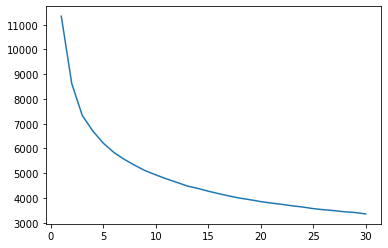

In [12]:
kmeans_scree_plot(X, StandardScaler, 1, 30, 30)

Awesome, judging by the inflection of the scree plot, 5 clusters is pretty reasonable for minimizing our inertia within a practical number of clusters. We can confidently stick with it. Let's check out our silhouette score to see how well our artists are being separated .

In [14]:
silhouette_score(test.data.drop(columns=['cluster']), test.data['cluster'], metric='euclidean')

0.15726646311836764

Not ideal, we'd like to be as close to 1 as possible. We have some definite overlap in our clusters, but that's to be expected given the relative homogeneity of hip-hop.

Next we'll try to get a projection of our data through TSNE so we can visualize our clusters a bit more clearly. We'll experiment with a few different perplexities and try to settle on a reasonable representation.

In [51]:
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300, random_state=77)
tsne_results = tsne.fit_transform(test.data.drop(columns=['cluster']))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1260 samples in 0.001s...
[t-SNE] Computed neighbors for 1260 samples in 0.054s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1260
[t-SNE] Computed conditional probabilities for sample 1260 / 1260
[t-SNE] Mean sigma: 0.694414
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.197769
[t-SNE] KL divergence after 300 iterations: 1.441971


In [75]:
X_tsne = X_scaled.copy()
X_tsne['tsne-2d-one'] = tsne_results[:,0]
X_tsne['tsne-2d-two'] = tsne_results[:,1]

y = list(test.data['cluster'])

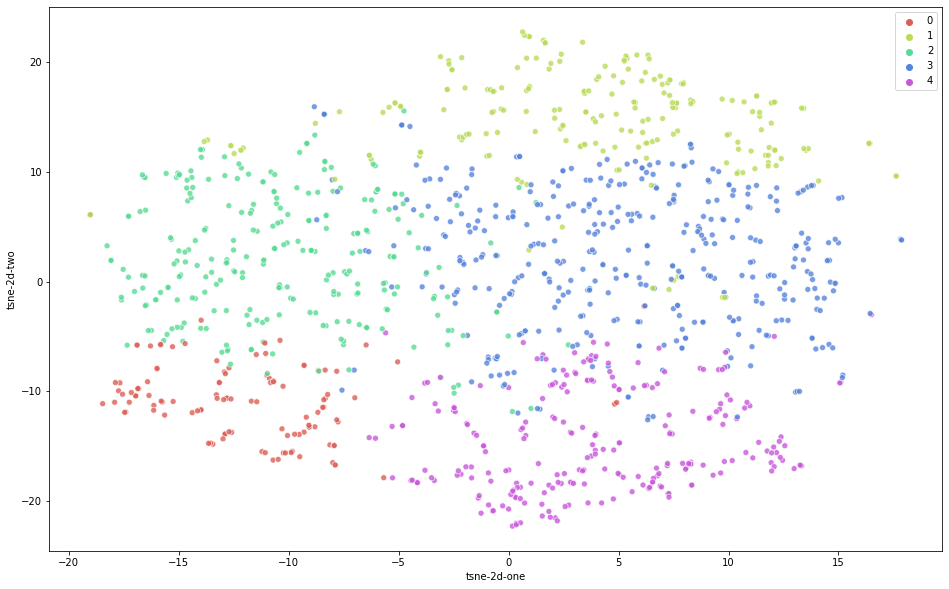

In [53]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=X_tsne,
    hue=y,
    palette=sns.color_palette("hls", 5),
    legend="full",
    alpha=0.8
)

Not too shabby, across the experiments there seems to be a proximity between our Archetypal and Lyrical: Diverse clusters, which is sensible. We also see consistent adjacency between R&B and Club/Trap songs, both of which tend to be repetitious and have overlapping semantic content. 

We'll go ahead and store these results alongside cluster labels and unscaled data for use in the Tableau version of this visualization. 

In [91]:
X_viz = X_labeled.copy()
X_viz['tsne-2d-one'] = tsne_results[:,0]
X_viz['tsne-2d-two'] = tsne_results[:,1]
X_viz['cluster'] = test.data['cluster']
X_viz = X_viz.reset_index()

In [92]:
X_viz.rename(columns={'Lyrical/Misc':'Lyricism', 'Money/Party':'Turn-Up', 'Bragging/Combative':'Flexing', 'Romance/Sex':'Sex & Romance', 'unique_word_rate':'Unique Word Rate', 'syllables_per_line':'Syllables Per Line'}, inplace=True)
X_viz['cluster'] = X_viz['cluster'].map({0:'Club & Trap', 1:'Lyrical (Dense)', 2:'Archetypal', 3:'Lyrical (Diverse)', 4:'R&B'})

In [93]:
X_viz

,artist,Lyricism,Flexing,Turn-Up,Sex & Romance,words_per_line,unique_words,Unique Word Rate,Syllables Per Line,syllables_per_word,cluster,tsne-2d-one,tsne-2d-two
0,03 Greedo,0.012388,0.040464,0.021360,0.011842,35.125816,185.375000,0.070810,9.211347,0.261876,Archetypal,-15.686582,-5.360711
1,070 Shake,0.015179,0.001804,0.021861,0.036665,30.507007,137.470588,0.071274,8.091570,0.264949,R&B,-2.166715,-17.549976
2,2 Chainz,0.018329,0.023071,0.021967,0.006407,32.916186,194.111111,0.090778,8.641371,0.262462,Archetypal,-2.776062,-1.379293
3,2 Pistols,0.013755,0.030431,0.018532,0.021855,28.376804,178.272727,0.085574,7.243027,0.255224,Archetypal,-7.512867,-5.744286
4,21 Savage,0.007464,0.046448,0.046098,0.008801,33.424155,189.095238,0.070440,8.484020,0.253769,Club & Trap,-14.015560,-11.704087
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,Zebra Katz,0.025077,0.012421,0.018921,0.016527,25.122420,132.944444,0.087163,6.521429,0.259716,R&B,1.544773,-10.650178
1256,Zelooperz,0.018682,0.037817,0.003213,0.006282,29.884914,151.060606,0.095839,7.746176,0.258715,Archetypal,-6.850880,-1.027505
1257,Zion I,0.031290,0.000425,0.003131,0.006091,34.300381,210.200000,0.104322,8.986945,0.262015,Lyrical (Diverse),6.416286,10.655698
1258,bbno$,0.009183,0.010923,0.004047,0.009563,31.152735,92.333333,0.055000,8.575163,0.275106,R&B,12.309433,-14.555338


In [94]:
X_viz.to_csv('tsne_df_v2.csv')

### Recommender

Here we'll implement a simple recommender using either cosine or euclidean distances. A similar version will be housed in our webapp. We simply take a given artist and compute the n closest artists in the data set. 

In [132]:
def recommend(artist, data, n_recs):
    """
    calculate n_recs closest artists in data by euclidean distance
    """
    distances = []
    # convert the artist's row into a numpy array
    target = data.loc[artist].to_numpy()
    artist_list = list(data.index)
    artist_list.remove(artist)
    
    for name in artist_list:
        # Pull each artist row and convert into a numpy array
        comparison = data.loc[name].to_numpy()
        
        # Create a 2 row matrix from the two artist arrays
        stack = np.vstack((target, comparison))
        
        # Euclidean Distance
        dist = pdist(stack)
        distances.append(dist[0])
        
        # Cosine Distance
        # dist = cosine(target, comparison)
        # distances.append(dist)
    
    # sort the distances and return the n shortest ones
    top_n_ind = np.argsort(distances)[0:n_recs]
    
    return [artist_list[i] for i in top_n_ind]

In [137]:
recommend('Usher', X_scaled, 5)

['R. Kelly', 'Benny Blanco', 'Murs', 'Fergie', 'Verse Simmonds']